In [499]:
from math import sqrt, factorial, pi, exp
from fractions import Fraction
import numpy as np
from scipy.special import erf, erfinv
from itertools import zip_longest

In [591]:
from matplotlib.patches import ConnectionPatch
from matplotlib.collections import PatchCollection
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
plt.style.use('seaborn')
%matplotlib inline


legend_opts = {
    'fontsize':12,
    'frameon':True, 
    'framealpha':1,
    'facecolor':'white',
    'edgecolor':'black',
    'labelspacing':0.1}

# Inversion sampling

## Relationship between CDF and PDF of a distribution

In [669]:
def cdf(z):
    return 0.5 + 0.5*erf(z/sqrt(2))

In [670]:
def pdf(z):
    return 1/np.sqrt(2*pi) * np.exp(-z**2/2)

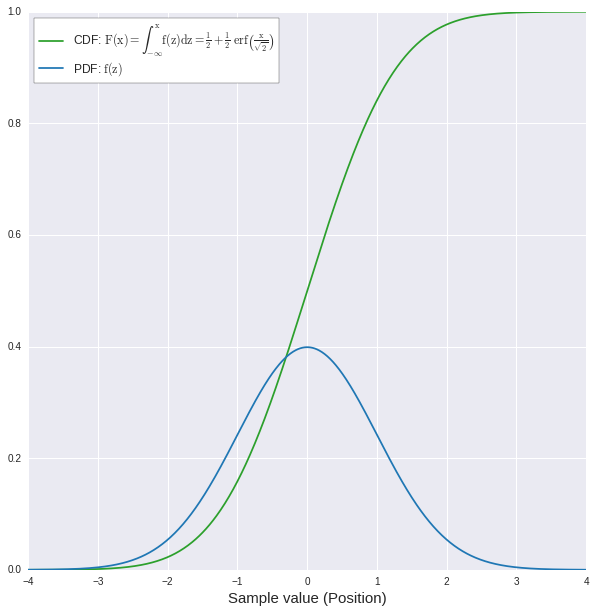

In [649]:
fig, ax = plt.subplots(figsize=(10, 10))
z = np.arange(-4, 4.01, 0.01)
ax.plot(z, cdf(z), label=r'CDF: $\mathrm{F( x) =\int ^{x}_{-\infty } f( z) dz=\frac{1}{2} +\frac{1}{2} \ erf\left(\frac{x}{\sqrt{2}}\right)}$', color='tab:green')
ax.plot(z, pdf(z), label=r'PDF: $\mathrm{f(z)}$', color='tab:blue')
ax.set_xlabel('Sample value (Position)', fontsize=15)
ax.legend(**legend_opts, loc='upper left')

## Sampling from position to area

In [737]:
rng = np.random.RandomState(seed=42)
samples = rng.standard_normal(size=10)
cumprobs = cdf(samples)

In [740]:
def update(i, fig, cdf_ax, density_ax, cumprob_ax):
    if i%10==0:
        print(i)
    fig.suptitle(f'Sample {i+1}', fontsize=20)
    sample, cumprob = samples[i], cumprobs[i]
    rounded_sample, rounded_cumprob = np.floor(sample*10)/10, np.floor(cumprob*10)/10
    
    density_counts.setdefault(rounded_sample, 0)
    density_ax.add_artist(Rectangle((rounded_sample, density_counts[rounded_sample]), 0.1, 1, facecolor='tab:blue'))
    density_counts[rounded_sample] += 1
    
    cumprob_counts.setdefault(rounded_cumprob, 0)
    cumprob_ax.add_artist(Rectangle((cumprob_counts[rounded_cumprob], rounded_cumprob), 1, 0.1, facecolor='tab:green'))
    cumprob_counts[rounded_cumprob] += 1
    
    cdf_ax.scatter(sample, cumprob, color='black', zorder=10)
    cdf_ax.scatter(sample, 1, color='tab:blue', clip_on=False, zorder=11)
    cdf_ax.scatter(4, cumprob, color='tab:green', clip_on=False, zorder=12)
    cdf_ax.hlines(cumprob, sample, 4, color='tab:green', linestyles=':', linewidth=1, alpha=0.5)
    cdf_ax.vlines(sample, cumprob, 1, color='tab:blue', linestyles=':', linewidth=1, alpha=0.5)

0
0
0


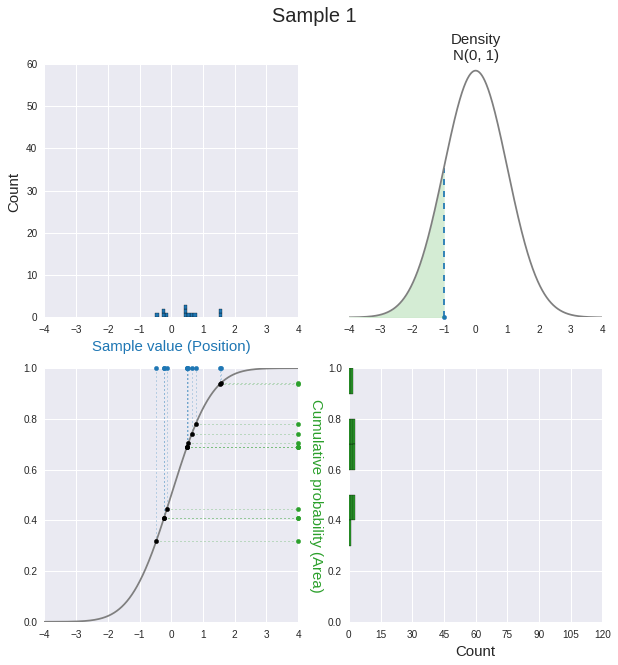

In [741]:
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(2, 2)
z = np.arange(-4, 4.01, 0.01)
z_left = z[z<-1]

cdf_ax = fig.add_subplot(grid[1, 0])
cdf_ax.plot(z, cdf(z), color='tab:gray')
cdf_ax.set_xlim(-4, 4)
cdf_ax.set_ylim(0, 1)

pdf_ax = fig.add_subplot(grid[0, 1], frameon=True)
pdf_ax.patch.set_edgecolor('black') 
pdf_ax.plot(z, pdf(z), color='tab:gray')
pdf_ax.scatter(-1, 0, color='tab:blue', clip_on=False)
pdf_ax.vlines(-1, 0, pdf(-1), linestyles='--', color='tab:blue')
pdf_ax.fill_between(z_left, 0, pdf(z_left), color='tab:green', alpha=0.2)
# pdf_ax.text(-0.9, 0.01, 'Sample value\n(Position)', color='tab:blue', fontsize=15)
# pdf_ax.text(-3, pdf(-3)+0.01, 'Cumulative probability\n(Area))', color='tab:green', ha='left', va='bottom', fontsize=15, rotation=73)
pdf_ax.set_xlim(-4, 4)
pdf_ax.set_ylim(0, 0.41)
pdf_ax.set_facecolor('white')
pdf_ax.set_yticks([])
pdf_ax.set_xlabel('Density\nN(0, 1)', fontsize=15)
pdf_ax.xaxis.set_label_position('top') 

density_ax = fig.add_subplot(grid[0, 0], sharex=cdf_ax)
density_ax.set_ylim(0, 60)
density_ax.set_xlabel('Sample value (Position)', fontsize=15, color='tab:blue')
density_ax.set_ylabel('Count', fontsize=15)

cumprob_ax = fig.add_subplot(grid[1, 1], sharey=cdf_ax)
cumprob_ax.set_xlim(0, 120)
cumprob_ax.set_xticks(np.arange(0, 121, 15))
cumprob_ax.set_xlabel('Count', fontsize=15)
cumprob_ax.set_ylabel('Cumulative probability (Area)', fontsize=15, rotation=270, va='top', color='tab:green')

density_counts = {}
cumprob_counts = {}
anim = FuncAnimation(fig, lambda i: update(i, fig, cdf_ax, density_ax, cumprob_ax), 
                     frames=range(len(samples)), interval=50, repeat=True)
anim.save('viz/cdf.mp4', writer='ffmpeg')

## Erf(x)

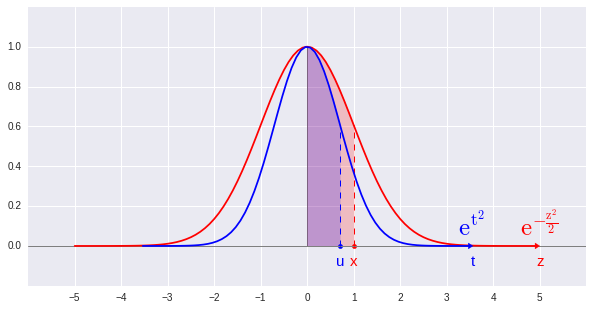

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.axhline(0, color='tab:gray', lw=1, zorder=1)
ax.vlines(0, 0, 1, color='tab:gray', lw=1, zorder=1)

x = 1
z = np.arange(-5, 5, 0.1)
z_plus = np.arange(0, x+0.001, 0.1)

u = x/sqrt(2)
t = np.arange(-5/sqrt(2), 5/sqrt(2), 0.1)
t_plus = np.arange(0, u, 0.1)

ax.plot(z, np.exp(-z**2/2), color='red')
ax.fill_between(z_plus, 0, np.exp(-z_plus**2/2), color='red', alpha=0.2)
ax.arrow(z[-1]-0.1, 0, 0.1, 0, color='red', head_width=0.03, head_length=0.1)
ax.text(z[-1]+0.1, -0.1, 'z', color='red', horizontalalignment='center', fontsize=15)
ax.scatter(x, 0, color='red')
ax.vlines(x, 0, np.exp(-x**2/2), linestyle='--', linewidth=1, color='red')
ax.text(x, -0.1, 'x', color='red', horizontalalignment='center', fontsize=15)

ax.plot(t, np.exp(-t**2), color='blue')
ax.fill_between(t_plus, 0, np.exp(-t_plus**2), color='blue', alpha=0.2)
ax.arrow(t[-1]-0.1, 0, 0.1, 0, color='blue', head_width=0.03, head_length=0.1, zorder=10)
ax.text(t[-1]+0.1, -0.1, 't', color='blue', horizontalalignment='center', fontsize=15)
ax.scatter(u, 0, color='blue')
ax.vlines(u, 0, np.exp(-u**2), linestyle='--', linewidth=1, color='blue')
ax.text(u, -0.1, 'u', color='blue', horizontalalignment='center', fontsize=15)

ax.set_xticks(range(-5, 6))
ax.set_yticks(np.arange(0, 1.01, 0.2))

ax.text(5, 0.05, r'$\mathrm{e^{-\frac{z^{2}}{2}}}$', color='red', fontsize=25, horizontalalignment='center')
ax.text(5/sqrt(2), 0.05, r'$\mathrm{e^{t^{2}}}$', color='blue', fontsize=25, horizontalalignment='center')
plt.show()

## Erfinv(x)

In [705]:
def update_p(p, n):
    dp = [power * coeff for power, coeff in enumerate(p)][1:]
    pf = [0] + p
    two_npf = [2*n*coeff for coeff in pf]
    updated_p = [dp_coeff + two_npf_coeff for dp_coeff, two_npf_coeff in zip_longest(two_npf, dp, fillvalue=0)]
    return updated_p

In [708]:
taylor_coeffs = [0, sqrt(pi)/2]
p = [0, 2]
for n in range(2, 51):
    const = p[0]
    fraction_coeff = Fraction(const, (factorial(n) * 2**n))
    taylor_coeff = fraction_coeff * sqrt(pi)**n
    taylor_coeffs.append(taylor_coeff)
    p = update_p(p, n)

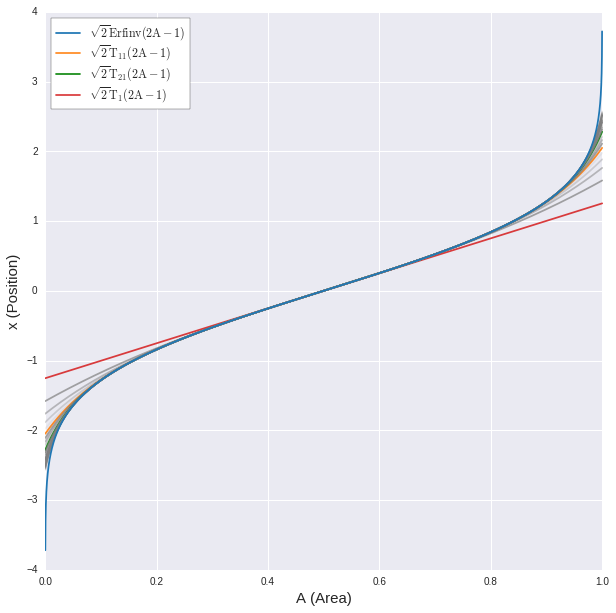

In [736]:
fig, ax = plt.subplots(figsize=(10, 10))
a = np.arange(0, 1.0001, 0.0001)
b = 2*a - 1
x = np.zeros(len(a))
color_dict = {1: 'tab:red', 11:'tab:orange', 21:'green'}
label_dict = {1: '$\mathrm{\sqrt{2}{T_1(2A-1)}}$', 11: '$\mathrm{\sqrt{2}T_{11}(2A-1)}$', 21: '$\mathrm{\sqrt{2}T_{21}(2A-1)}$'}

for power, coeff in enumerate(taylor_coeffs):
    x += sqrt(2) * (coeff * b**power)
    if power%2 != 0:
        ax.plot(a, x, color=color_dict.get(power, 'tab:gray'), alpha=(1-0.1*power), label=label_dict.get(power, '_nolegend_'))
ax.plot(a, sqrt(2) * erfinv(b), color='tab:blue', label='$\mathrm{\sqrt{2}Erfinv(2A-1)}$')

ax.set_xlim(-0.001, 1.001)
ax.set_xlabel('A (Area)', fontsize=15)
ax.set_ylabel('x (Position)', fontsize=15)
ax.legend()

handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, **legend_opts, loc='upper left')

In [677]:
class InverseCDF:
    def __init__(self, power):
        self.taylor_coeffs = calculate_taylor_coeffs(power)
        
    def calculate_taylor_coeffs(self, power):
        taylor_coeffs = [0, sqrt(pi)/2]
        if power < 2:
            return taylor_coeffs[:power]
        else:
            p = [0, 2]
            for n in range(2, power+1):
                const = p[0]
                fraction_coeff = Fraction(const, (factorial(n) * 2**n))
                taylor_coeff = fraction_coeff * sqrt(pi)**n
                taylor_coeffs.append(taylor_coeff)
                p = update_p(p, n)
            return taylor_coeffs
    
    def calculate(self, a):
        b = 2*a - 1
        x = sqrt(2) * sum(coeff * b**power for power, coeff in enumerate(self.taylor_coeffs))
        return x

In [678]:
a = 0.6
f21 = InverseCDF(power=21)
f11 = InverseCDF(power=11)
f1 = InverseCDF(power=1)
f50.calculate(a), sqrt(2) * erfinv(2*a-1)

(0.2533471031357997, 0.2533471031357997)

In [685]:
rng = np.random.RandomState(seed=42)
unif_samples = rng.uniform(size=(1000, 2))

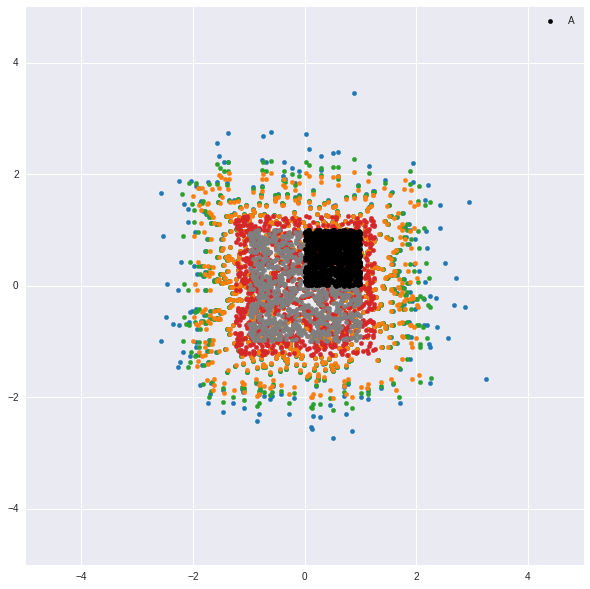

In [686]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
def choose_label(i, label):
    if i == 0:
        return label
    else:
        return '_nolegend_'


for i, sample in enumerate(unif_samples):
    ax.scatter(sample[0], sample[1], color='black', zorder=16, label=choose_label(i, 'A'))
    ax.scatter(2*sample[0]-1, 2*sample[1]-1, color='tab:gray', zorder=15, label=choose_label(i, 'A'))
    ax.scatter(f1.calculate(sample[0]), f1.calculate(sample[1]), color='tab:red', zorder=14, label=choose_label(i, 'A'))
    ax.scatter(f11.calculate(sample[0]), f11.calculate(sample[1]), color='tab:orange', zorder=13, label=choose_label(i, 'A'))
    ax.scatter(f21.calculate(sample[0]), f21.calculate(sample[1]), color='tab:green', zorder=12, label=choose_label(i, 'A'))
    ax.scatter(sqrt(2)*erfinv(2*sample[0]-1), sqrt(2)*erfinv(2*sample[1]-1), color='tab:blue', zorder=11, label=choose_label(i, 'A'))
    
ax.legend()

In [ ]:
#